# Canada Balance of International Payments

## Definitions
- The balance of international payments covers all economic transactions between Canadian residents and non-residents in three accounts: the current account, the capital account and the financial account.

- The current account covers transactions in goods, services, compensation of employees, investment income and secondary income (current transfers).

Source = https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1210015701&pickMembers%5B0%5D=3.2&cubeTimeFrame.startMonth=10&cubeTimeFrame.startYear=2000&cubeTimeFrame.endMonth=10&cubeTimeFrame.endYear=2023&referencePeriods=20001001%2C20231001

https://www150.statcan.gc.ca/n1/daily-quotidien/240228/dq240228b-eng.htm

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import math
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

In [2]:
def download_csv(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as file:
        file.write(response.content)

csv_url = 'https://www150.statcan.gc.ca/t1/tbl1/en/dtl!downloadDbLoadingData-nonTraduit.action?pid=1210015701&latestN=0&startDate=20001001&endDate=20231001&csvLocale=en&selectedMembers=%5B%5B%5D%2C%5B1%2C2%5D%2C%5B2%5D%2C%5B%5D%5D&checkedLevels=0D1%2C3D1%2C3D2%2C3D3'
destination_path = 'data_file.csv'

download_csv(csv_url, destination_path)

df = pd.read_csv(destination_path, encoding='utf-8')
df.head(5)

,REF_DATE,GEO,DGUID,Trade,Seasonal adjustment,Principal trading partners,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2000-10,Canada,2021A000011124,Receipts,Seasonally adjusted,Total of all countries,Dollars,81,millions,6,v1353834187,1.1.2.1,15536,NaN,NaN,NaN,0
1,2001-01,Canada,2021A000011124,Receipts,Seasonally adjusted,Total of all countries,Dollars,81,millions,6,v1353834187,1.1.2.1,15430,NaN,NaN,NaN,0
2,2001-04,Canada,2021A000011124,Receipts,Seasonally adjusted,Total of all countries,Dollars,81,millions,6,v1353834187,1.1.2.1,15433,NaN,NaN,NaN,0
3,2001-07,Canada,2021A000011124,Receipts,Seasonally adjusted,Total of all countries,Dollars,81,millions,6,v1353834187,1.1.2.1,15186,NaN,NaN,NaN,0
4,2001-10,Canada,2021A000011124,Receipts,Seasonally adjusted,Total of all countries,Dollars,81,millions,6,v1353834187,1.1.2.1,15112,NaN,NaN,NaN,0


# OVERALL PICTURE
- Lets see the overall trend

In [3]:
sum_df = df[df['Principal trading partners']=='Total of all countries']
sum_df.head(2)

,REF_DATE,GEO,DGUID,Trade,Seasonal adjustment,Principal trading partners,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2000-10,Canada,2021A000011124,Receipts,Seasonally adjusted,Total of all countries,Dollars,81,millions,6,v1353834187,1.1.2.1,15536,NaN,NaN,NaN,0
1,2001-01,Canada,2021A000011124,Receipts,Seasonally adjusted,Total of all countries,Dollars,81,millions,6,v1353834187,1.1.2.1,15430,NaN,NaN,NaN,0


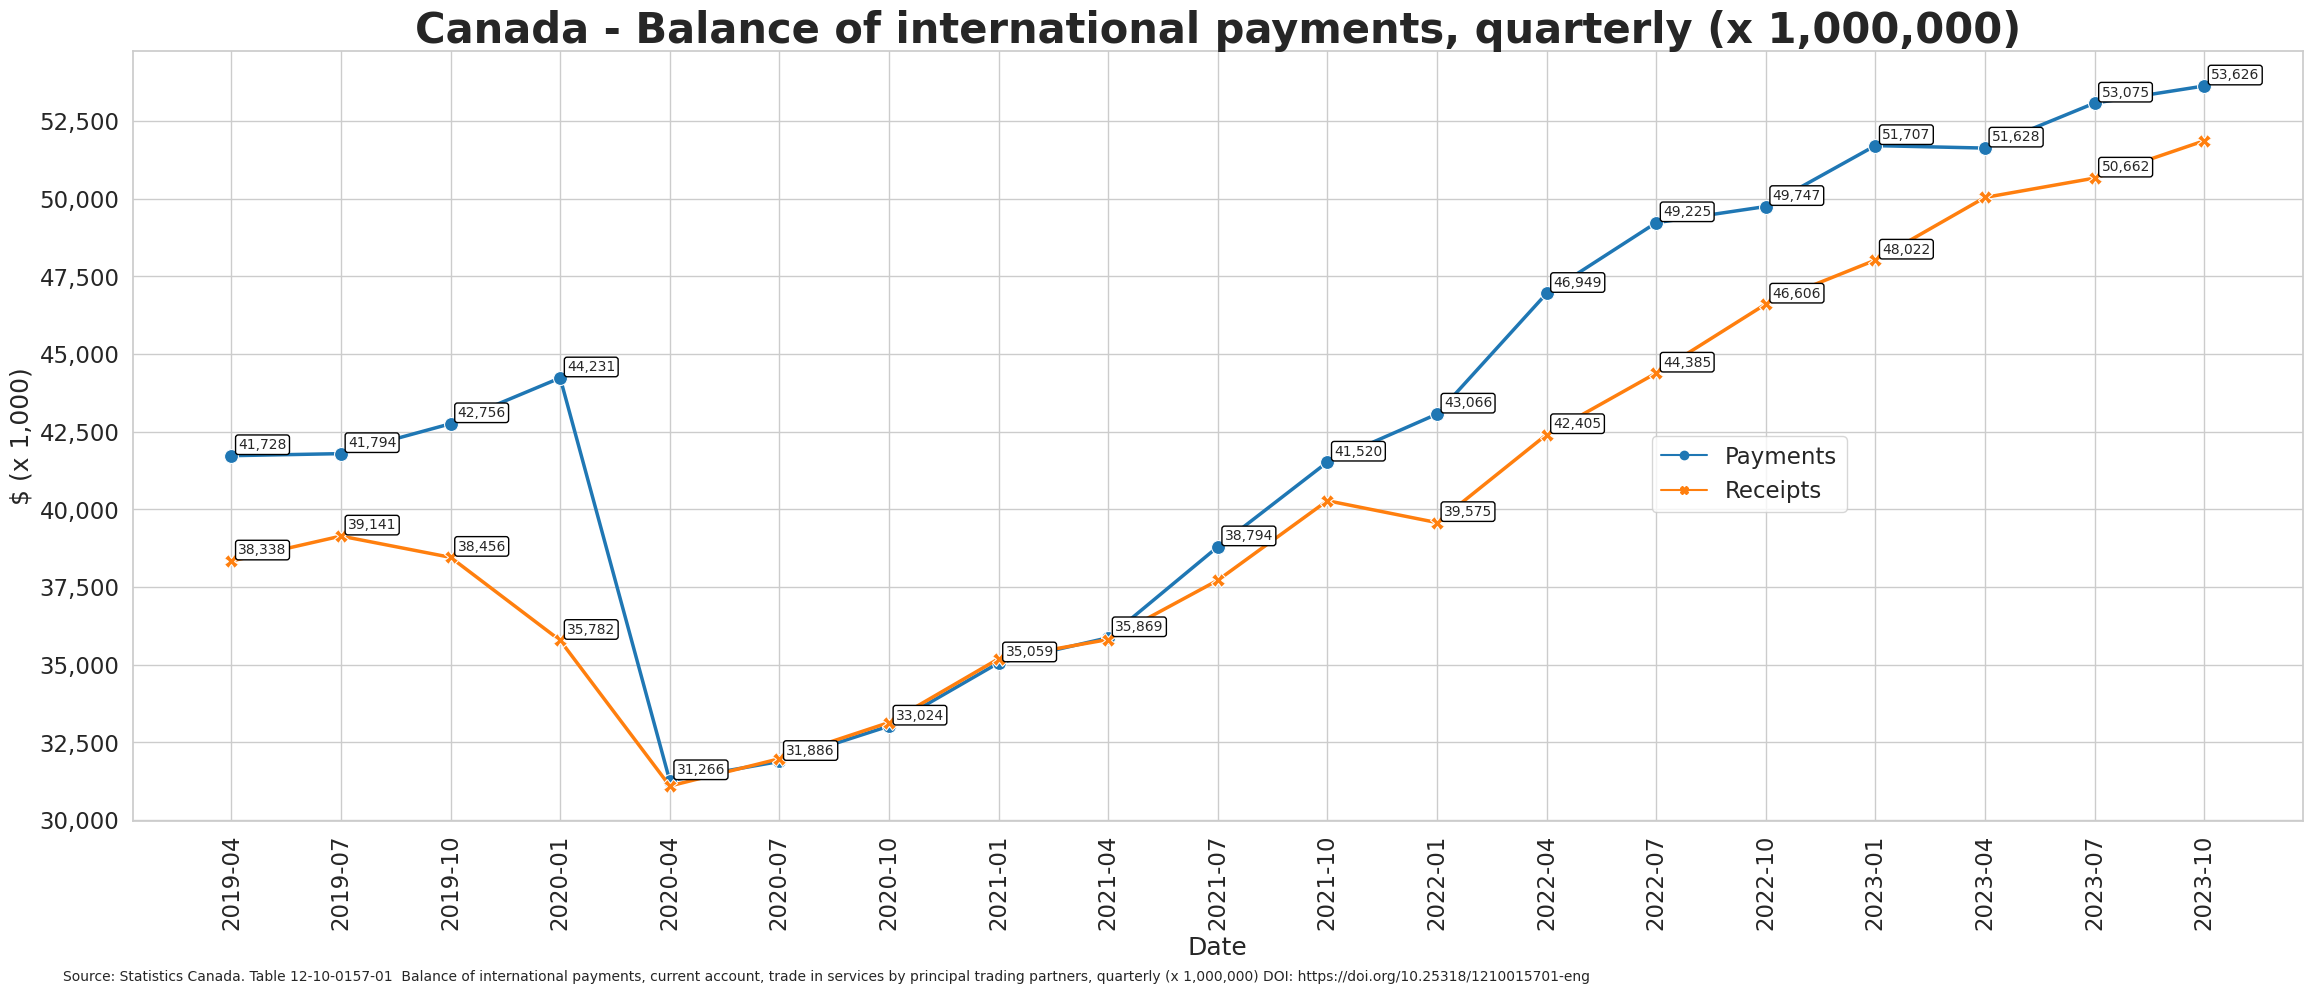

In [4]:
final_df = sum_df[sum_df['REF_DATE'] > '2019-01-01']
final_df = final_df.pivot(index='REF_DATE', columns='Trade', values='VALUE')

sns.set(style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(figsize=(28, 10), frameon=False)
sns.lineplot(data=final_df, palette="tab10", linewidth=2.5, markers=True, dashes=False, markersize=10, ax=ax)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

ax.set_xticks(final_df.index)
ax.set_xlabel('Date')
ax.set_ylabel('$ (x 1,000)')
ax.set_title("Canada - Balance of international payments, quarterly (x 1,000,000)", fontdict={'size': 30, 'weight': 'bold'})

# Specify the exact location of the legend using the 'loc' parameter
ax.legend(loc='upper left', bbox_to_anchor=(0.7, 0.5), borderaxespad=0.)

#plt.ylim(0, 18500000)
ax.yaxis.set_major_locator(mtick.MaxNLocator(integer=True))
plt.xticks(rotation=90)

skip_count = 0  # Specify how many labels to skip
skip_label = 0  # Initialize skip_label counter

for index, row in final_df.iterrows():
    y_list = []
    for col in row:
        if not math.isnan(col):
            display_flag = 1
            for value in y_list:
                if abs(value - col) <= 2000:
                    display_flag = 0

            if display_flag == 1 and skip_label == 0:
                
                ax.annotate(f'{col:,.0f}', xy=(index, col), xytext=(5, 5), textcoords='offset points',
                            bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='white'),
                            fontsize=10) 
                
            y_list.append(col)

    skip_label = (skip_label + 1) % (skip_count + 1)

# Adding a footnote below the x-axis
footnote_text = "Source: Statistics Canada. Table 12-10-0157-01  Balance of international payments, current account, trade in services by principal trading partners, quarterly (x 1,000,000) DOI: https://doi.org/10.25318/1210015701-eng"
plt.figtext(0.1, -0.05, footnote_text, ha="left", fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))    
    
plt.savefig("graph1.png", transparent=True, bbox_inches='tight', pad_inches=0.05, dpi=500)